### Importações necessárias

In [2]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt

In [3]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from bs4 import BeautifulSoup
from PIL import Image

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import re
from time import time

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\carlo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
import os

if not os.path.exists("mineração_texto"):
    os.mkdir("mineração_texto")


In [6]:
df_relatos = pd.read_csv('C:\\Users\\carlo\\Downloads\\base_tratada(2019-2023).csv')


### Pré-porcessamento e limpeza dos relatos

In [7]:
total_palavras = df_relatos['relato'].apply(lambda x: len(x.split())).sum()

print(f'Total de palavras no DataFrame: {total_palavras}')

Total de palavras no DataFrame: 6556784


In [8]:
df_relatos.shape

(47607, 21)

In [9]:
relatos=df_relatos[['relato']]

In [11]:
pd.set_option('display.max_colwidth', None)

In [12]:
relatos.head(5)

,relato
0,"nacional marisangela ferreira pacheco uipp - terra firme comunicar citados trabalhando esposa funcinário trabalhar , chamada nezia chaves gomes fazendo escândalo frente loja relatora trabalha . mulher dizia : `` vou pegar cortar toda cara , desa puta , vou deixar arreada chão furar todinha '' ( textuais ) . vítima diz tempo nezia espalha relatora caso marido , levy baia , relatora trabalha . sente constrangida fofocas ameaças , tempo pede levy convencer esposa dois relação , rapaz faz nada , fica calado . sabe suspeita reside marambaia , passagem simão jatene , número 7 , água cristal trabalha passagem francisco xavier , final jabatiteua , padaria fica esquina , próximo vileta ."
1,"relatora qualificada , seccional urbana polícia , declarar 26/01/2019 , 18:00 , enquanto visitava tia ( nacional “ geraldina brito sales ) , hospital saúde mulher , ap 810 , localizada tv . humaita , 1558 – marco , 66085-220 , agredida fisicamente tapas , arranhões , puxões socos região rosto , tórax membros superiores nacional “ simone carla sales duarte ” , prima . contenda começou devido problemas familiares relatora revidou procurou afastar ímpeto agressivo nacional ; satisfeita , nacional agressora proferiu impropérios , dentro : “ louca ” , “ pilantra , safada ” , “ filha puta ” etc . momentos antes realizou atos contra outros parentes dentro deste hospital . local momento agressões presentes enfermeiras plantão , estando disponíveis testemunhas . findo ocorrência , relatora dirigiu-se seccional urbana , pois pretende tomar devidas providências legais . registra-se direito ."
2,", especializada denunciar irmão ailton silva farias , 62 , taxista , tv . humaitá , nº262 , casa 3 , bairro : pedreira , belém-pa. comunica irmão agressivo . , 02/11/2019 13:00 relatora limpando residência , ouviu populares gritando ailton ia matar marido . relatora correu presenciou ailton faca tentando acertar marido relatora , dentro veículo . relatora ailton ia matar marido , relatora puxou ailton braço ailton tentou furar relatora faca . filha relatora correu conseguiu segurar ailton , ofendeu relatora : “ vagabunda , prostituta , ladrona ’ . relatora afirma ailton alcoolizado . oferecido abrigo relatora interesse , oferecido medidas protetivas relatora requererá seguintes : aproximação ofendida , familiares testemunhas , limite mínimo distância agressor ; contato ofendida , familiares testemunhas qualquer comunicação . deseja representar criminalmente contra ailton silva farias , 62 , taxista , tv . humaitá , nº262 , casa 3 , bairro : pedreira , belém-pa. apresentou filha testemunha vania gleyce ribeiro tavares . registra-se/////////"
3,"relator qualificado , qualidade policial militar , apresenta nessa delegacia especializada nacional david melo mamede , solteiro , 23 , nascido 07/12/1996 , natural belém/pa , filho maria iraci oliveira melo antônio jarbas gonçalves mamede , ocupação , beco jorge , nº 36 , pass . nova rua iracema , bairro : marambaia , belém/pa , virtude ter agredido fisicamente ameaçado companheira vania sousa farias , solteira , 31 , nascida 26/08/1988 , natural augusto correa/pa , filha rosilene sousa farias antônio ferreira farias , autônoma , rua airton senna , nº 01 , próximo av . brasil , bairro : 40 horas ( coqueiro ) , ananindeua/pa ; ( 06/11/2019 ) , 13:00 horas , serviço ronda bairro marambaia , acionado via ciop informação havia casal discutindo residência ; ato contínuo dirigiu endereço informado , encontrou vítima , relatou desde ontem casal discutindo chegou registrar ocorrência manhã ( 06/11/2019 ) novamente ameaçado morte agredido fisicamente ; diante tal situação , todos conduzidos apresentados autoridade policial plantonista , determinou lavratura auto prisão flagrante delito crime lesão corporal ameaça - violência doméstica . registra-se providências cabíveis///////////////"
4,"relatora qualificada epígrafe seccional comunicar vítima ameças ex companheiro , dheison rosário souza , ( domiciliado pa140 , rua santa lu

* Limpeza e remoção de palvras inadequadas

In [28]:
stop_words = set(stopwords.words("portuguese"))
stop_words.update([ 'aai','abaetetuba', 'abaixa', 'abaixada', 'abaixado', 'abaixar', 
    'abaixar som', 'abaixar',' volume', 'abaixasse', 'abaixasse','som', 'abaixo', 
    'abaixo','assinado', 'abaixo','elencadas','informacoes', 'olho', 
    'proibicao', 'proibição', 'abaixou', 'pegar', 'vidro', 'relatora', 'policial', 'militar', 
    'jurunas', 'silva', 'vtr', 'ciop', 'santos', 'bairro', 'fato', 'via', 'havia', 'guarnicao',
    'relator', 'sido', 'policia', 'sgt', 'rua', 'nacional', 'seccional', 'icoaraci', 'urbana', 
    'local', 'fato', 'silva', 'carlos', 'comunicar', 'bairro', 'sacramenta', 'rua', 'uipp','terra',
    'firme','qualificada', 'marambaia', 'passagem', 'momento', 'relatante', 'cpf', 
    'vou', 'textuais', 'vai', 'maria', 'vem', 'sra', 'depoente', 'relata', 'jose', 'apos', 
    'nacional', 'local', 'celular', 'iria', 'relator', 'declarante', 'declarado', 'policiais', 
    'guarnição', 'souza', 'antonio', 'paulo', 'santos', 'vou', 'textuais', 'qualificada', 
    'comparece', 'ana', 'joao', 'maria', 'jose', 'carlos', 'paulo', 'marcos', 'luiz', 'claudia', 
    'ana', 'maria', 'julia', 'isabella', 'sofia', 'alice', 'laura', 'manuela', 'helena', 'luiza', 
    'valentina', 'giovanna', 'beatriz', 'mariana', 'leticia', 'camila', 'emily', 'yasmin', 'clara', 
    'ana clara', 'ana beatriz', 'relator', 'delegado', 'delegada', 'testemunha', 'vítima', 'acusado', 
    'acusada', 'suspeito', 'suspeita', 'criminoso', 'criminosa', 'infrator', 'infratora', 'policial', 
    'agente', 'perito', 'perita', 'detido', 'detida', 'preso', 'presa', 'queixoso', 'queixosa', 
    'comunicar', 'fica', 'fim', 'ato', 'desde', 'pois', 'abadessa','belem','contatos','mora','aqui','casa','ver',
    'citados','usar', 'ameaças', 'mim','mensagens','mensagem','whatsapp', 'medidas','deseja','belmpa',
    'nascido', 'ter','comunicante','dizendo', 'comunica','aps','comunica delegacia','declara','sao', 'comunicante',
    'frente','bras', 'sao bras', 'cima', 'informou', 'costa', 'aludido', 'guama', 'comunica', 'tendo', 'pcpa', 
    'registrase' ,'devidas', 'horas', 'telefone', 'refere', 'comunicacao', 'informar', 'aps', 'ter','veiculo', 'comunicante', 
    'motorista', 'eduardo', 'placa', 'cor', 'moto', 'frente', 'thiago', 'veculo', 'passou', 'motocicleta', 'ficou', 'uber', 
    'respondeu', 'aplicativo', 'tendo', 'aparelho', 'belmpa', 'quanto', 'pra', 'fazer', 'seguinte', 'delegacia','comunica', 
    'mencionados', 'gabriel', 'renato', 'chegou', 'manoel', 'belempa', 'fdata', 'fdata nascimento', 'mencionados', 
    'delegacia', 'atravs' ])

stop_words = list(stop_words)

def limpar_texto(texto):
    texto = re.sub(r'\(\d{2}\)\s?\d{4,5}-\d{4}', '', texto)
    texto = re.sub(r'\d{5}-\d{3}', '', texto)
    texto = re.sub(r'\d+', '', texto)
    texto = re.sub(r'[^a-zA-Z\s]', '', texto)
    texto = re.sub(r'\s+', ' ', texto).strip()
    # Remover stopwords
    tokens = word_tokenize(texto.lower())
    texto = ' '.join([word for word in tokens if word not in stop_words])
    
    return texto

relatos['relato'] = relatos['relato'].apply(limpar_texto)

C:\Users\carlo\AppData\Local\Temp\ipykernel_18872\1366795812.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relatos['relato'] = relatos['relato'].apply(limpar_texto)


In [14]:
relatos.head(5)

,relato
0,marisangela ferreira pacheco trabalhando esposa funcinrio trabalhar chamada nezia chaves gomes fazendo escndalo frente loja trabalha mulher dizia cortar toda cara desa puta deixar arreada cho furar todinha vtima diz tempo nezia espalha caso marido levy baia trabalha sente constrangida fofocas ameaas tempo pede levy convencer esposa dois relao rapaz faz nada calado sabe reside simo jatene nmero gua cristal trabalha francisco xavier final jabatiteua padaria esquina prximo vileta
1,polcia declarar enquanto visitava tia geraldina brito sales hospital sade mulher ap localizada tv humaita marco agredida fisicamente tapas arranhes puxes socos regio rosto trax membros superiores simone carla sales duarte prima contenda comeou devido problemas familiares revidou procurou afastar mpeto agressivo satisfeita agressora proferiu improprios dentro louca pilantra safada filha puta etc momentos antes realizou atos contra outros parentes dentro deste hospital agresses presentes enfermeiras planto estando disponveis testemunhas findo ocorrncia dirigiuse pretende tomar devidas providncias legais registrase direito
2,especializada denunciar irmo ailton farias taxista tv humait n pedreira belmpa comunica irmo agressivo limpando residncia ouviu populares gritando ailton ia matar marido correu presenciou ailton faca tentando acertar marido dentro veculo ailton ia matar marido puxou ailton brao ailton tentou furar faca filha correu conseguiu segurar ailton ofendeu vagabunda prostituta ladrona afirma ailton alcoolizado oferecido abrigo interesse oferecido medidas protetivas requerer seguintes aproximao ofendida familiares testemunhas limite mnimo distncia agressor contato ofendida familiares testemunhas qualquer comunicao deseja representar criminalmente contra ailton farias taxista tv humait n pedreira belmpa apresentou filha vania gleyce ribeiro tavares registrase
3,qualificado qualidade apresenta nessa delegacia especializada david melo mamede solteiro nascido natural belmpa filho iraci oliveira melo antnio jarbas gonalves mamede ocupao beco jorge n pass nova iracema belmpa virtude ter agredido fisicamente ameaado companheira vania sousa farias solteira nascida natural augusto correapa filha rosilene sousa farias antnio ferreira farias autnoma airton senna n prximo av brasil horas coqueiro ananindeuapa horas servio ronda acionado informao casal discutindo residncia contnuo dirigiu endereo informado encontrou vtima relatou ontem casal discutindo chegou registrar ocorrncia manh novamente ameaado morte agredido fisicamente diante tal situao todos conduzidos apresentados autoridade plantonista determinou lavratura auto priso flagrante delito crime leso corporal ameaa violncia domstica registrase providncias cabveis
4,epgrafe vtima ameas ex companheiro dheison rosrio domiciliado pa santa lucia n santa izabelpa hmin recebeu ligao telefnica ex companheiro ameaou atual namorado walter soldado dizendo poderia colocar pra dormir residncia pertencia poderia colocar pra dormir perto filhos durante ligao dheison ameaou dizendo perdeu noo perigoso acabar conviveu ex companheiro durante relacionamento dois filhos ketheleen ramos messias ramos vivem separados quatro nunca aceitou relacionamento registrou bop ameaas agresso fsica tentativa estupro contra dheison aparece vez imvel oficina bicicleta dheison utiliza desculpa ir equipamentos metalrgica fazer trabalhos oficina residncia santa izabelpa ademais entra permisso residncia acesso ex mulher antonia lado dheison invade residncia utilizando chave mestra trocou cadeados fechaduras respeita domiclio sair residncia perodo sentindo ameaada senhor sebastio pereira mendes ir domiciliar temporariamente residncia reparar trabalha oficina trreo imvel registrase


In [ ]:
relatos.loc[relatos['relato'].isin(['ameaas','ameaa']), 'relato'] = 'ameaça'
relatos.loc[relatos['relato'].isin(['providncias']), 'relato'] = 'providências'
relatos.loc[relatos['relato'].isin(['ameaou']), 'relato'] = 'ameaçou'
relatos.loc[relatos['relato'].isin(['ameaada']), 'relato'] = 'ameaçada'
relatos.loc[relatos['relato'].isin(['distncia']), 'relato'] = 'distância'
relatos.loc[relatos['relato'].isin(['distncia']), 'relato'] = 'distância'
relatos.loc[relatos['relato'].isin(['comunicao']), 'relato'] = 'comunicação'
relatos.loc[relatos['relato'].isin(['mnimo distncia']), 'relato'] = 'minimo distância'
relatos.loc[relatos['relato'].isin(['cidada']), 'relato'] = 'cidade'
relatos.loc[relatos['relato'].isin(['residncia']), 'relato'] = 'residência'
relatos.loc[relatos['relato'].isin(['criana']), 'relato'] = 'criança'
relatos.loc[relatos['relato'].isin(['vtima']), 'relato'] = 'vitima'


In [29]:
relatos_limpos = []
for w in range(len(relatos)):
  Relato = relatos['relato'].iloc[w]
  Relato  = re.sub("(\\d|\\W)+|\w*\d\w*"," ",Relato )
  Relato = ' '.join(s for s in Relato.split() if (not any(c.isdigit() for c in s)) and len(s) > 2)
  relatos_limpos.append(Relato)

text_filtered = ' '.join(relatos_limpos)

* Nuvem de palavras dos relatos

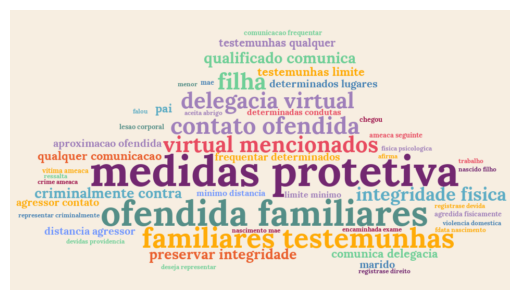

In [22]:
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    custom_palette= ['#9c0f48','#6FCF97','#722770','#ea5f2d','#6f95ff','#ffab07','#9F7FBA','#548e87', '#5cacc4','#e84a5f', '#4682B4']
    return np.random.choice(custom_palette)

mascara = np.array(Image.open('C:\\Users\\carlo\\Downloads\\nuvem1.jpg'))

wordcloud = WordCloud(stopwords=stop_words, 
                      max_words=50, 
                      width=750, 
                      height=500, 
                      background_color='#f7eee1', 
                      mask=mascara,
                      prefer_horizontal=1.0,
                      font_path="C:\\Users\\carlo\\Downloads\\lora\\Lora-Bold.ttf",
                      color_func=custom_color_func).generate(text_filtered)

# Mostrar a nuvem de palavras
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

with open("mineração_texto/nuvem_palavras_relatos.svg", "w") as f:
    f.write(wordcloud.to_svg())

### Pré-processamento para aplicação do algoritimo LDA

* Processo de vetorização

In [30]:
tf_vectorizer = CountVectorizer(
    min_df=5,           # Considera palavras que aparecem em pelo menos 5 documentos
    max_df=0.5,          # Exclui termos que aparecem em mais de 50% dos documentos
    max_features=50000,  # Limita o número de termos no vocabulário aos 50.000 mais frequentes
    stop_words=stop_words, # Remove palavras comuns que não são úteis
    ngram_range=(1, 1)   # Considera uni-gramas (termos únicos) e bi-gramas (pares de termos)
)

#Transformação
vec_text = tf_vectorizer.fit_transform(relatos_limpos)

#Retorna a lista de palavras
words = tf_vectorizer.get_feature_names_out()

print(vec_text.shape)
print(len(words))

c:\Users\carlo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['volume'] not in stop_words.
  warnings.warn(


(47607, 50000)
50000


In [31]:
words[0:20]

array(['aaproximao', 'aaproximao ofendida', 'abaetetubapa', 'abala',
       'abalada', 'abalada emocionalmente', 'abalada medo',
       'abalada psicologicamente', 'abalada situacao', 'abalada teme',
       'abalado', 'abalado psicologico', 'abalados', 'abalando', 'abalar',
       'abalo', 'abalo emocional', 'abalo psicologico', 'abalos',
       'abalos psicolgicos'], dtype=object)

### Implementação do LDA

#### Encontrar os tópicos

In [32]:
from sklearn.decomposition import LatentDirichletAllocation

In [33]:
def print_top_words(model, feature_names, n_top_words):
  #Essa função imprime as palavras mais importantes para cada tópico descoberto pelo modelo LDA.
  for topic_idx, topic in enumerate(model.components_):
    print("\n--\nTopic #{}: ".format(topic_idx + 1))
    message = ", ".join([feature_names[i]
                          for i in topic.argsort()[:-n_top_words - 1:-1]])
    print(message)
  print()

def display_topics(W, H, feature_names, relatos, no_top_words, no_top_documents):
    #Essa função exibe os tópicos e os documentos mais representativos para cada tópico.
    for topic_idx, topic in enumerate(H):
        print("\n--\nTopic #{}: ".format(topic_idx + 1))
        print(", ".join([feature_names[i]
                for i in topic.argsort()[:-no_top_words - 1:-1]]).upper())
        top_d_idx = np.argsort(W[:,topic_idx])[::-1][0:no_top_documents]
        for d in top_d_idx:
            print('Relato índice {} : \t{:.2f}'.format(d, W[d, topic_idx]))

#### Modelo de Latent Dirichlet Allocation (LDA) com a biblioteca scikit-learn para realizar modelagem de tópicos no conjunto de relatos representados por vetores de contagem de palavras.

In [34]:
lda = LatentDirichletAllocation(n_components=20, 
                                learning_method='batch', # 'online' equivale a minibatch no k-means
                                random_state=0)

t0 = time()

lda.fit(vec_text)
doc_topic_matrix = lda.transform(vec_text) #Converte os documentos representados pelos vetores vec_text em distribuições de tópicos, onde cada linha da matriz resultante (doc_topic_matrix) representa um documento e cada coluna representa a probabilidade do documento pertencer a um determinado tópico.

print("done in %0.3fs." % (time() - t0))

done in 654.685s.


* Palavras mais associadas com cada tópico

In [35]:
print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, 10)


Topics in LDA model:

--
Topic #1: 
companheiro, medidas, protetivas, medidas protetivas, ofendida, relacao, contato, residencia, declara, abrigo, vitima, filhos, ameaca, criminalmente, fisica, relacionamento, telefone, possui, filho, deseja

--
Topic #2: 
ofendida, declara, proibio, contato, companheiro, limite, aproximao, aproximao ofendida, distncia, distncia agressor, comunicao, preservar, contato ofendida, preservar integridade, qualquer, mnimo distncia, integridade, mnimo, limite mnimo, qualquer comunicao

--
Topic #3: 
residencia, vitima, providencias, sao, comunicante, lesao, comecou, informar, direito, frente, cidada, ameaca, lesao corporal, ocorrido, rosto, corporal, bras, discussao, sao bras, cima

--
Topic #4: 
vitima, ter, especializada, agredida, companheiro, fisicamente, apresenta, informou, procedimentos, agredido, crime, equipe, diante, delegacia, acionados, costa, autoridade, bpm, companheira, casal

--
Topic #5: 
ofendida, familiares, filho, aludido, familiares test

* Documentos mais associados a cada topico

In [36]:
display_topics(doc_topic_matrix, lda.components_, tf_feature_names, relatos, 10, 10)


--
Topic #1: 
COMPANHEIRO, MEDIDAS, PROTETIVAS, MEDIDAS PROTETIVAS, OFENDIDA, RELACAO, CONTATO, RESIDENCIA, DECLARA, ABRIGO, VITIMA, FILHOS, AMEACA, CRIMINALMENTE, FISICA
Relato índice 44795 : 	0.99
Relato índice 25646 : 	0.99
Relato índice 42855 : 	0.99
Relato índice 19169 : 	0.99
Relato índice 21401 : 	0.99
Relato índice 20723 : 	0.99
Relato índice 22179 : 	0.99
Relato índice 28553 : 	0.99
Relato índice 24841 : 	0.99
Relato índice 18616 : 	0.99

--
Topic #2: 
OFENDIDA, DECLARA, PROIBIO, CONTATO, COMPANHEIRO, LIMITE, APROXIMAO, APROXIMAO OFENDIDA, DISTNCIA, DISTNCIA AGRESSOR, COMUNICAO, PRESERVAR, CONTATO OFENDIDA, PRESERVAR INTEGRIDADE, QUALQUER
Relato índice 61 : 	1.00
Relato índice 3426 : 	1.00
Relato índice 6996 : 	1.00
Relato índice 11559 : 	1.00
Relato índice 3611 : 	1.00
Relato índice 3372 : 	1.00
Relato índice 2016 : 	1.00
Relato índice 17656 : 	1.00
Relato índice 11846 : 	1.00
Relato índice 1415 : 	1.00

--
Topic #3: 
RESIDENCIA, VITIMA, PROVIDENCIAS, SAO, COMUNICANTE, LESAO

In [37]:
print('Matriz documento-tópicos:' + str(doc_topic_matrix.shape))
print('Matriz tópicos-termos:' + str(lda.components_.shape))

Matriz documento-tópicos:(47607, 20)
Matriz tópicos-termos:(20, 50000)


* Atribuir um tópico principal a cada documento com base nas distribuições de tópicos obtidas do modelo LDA.

In [38]:
main_topic = []
mt_prob = []
for l in range(len(relatos['relato'])):
  main_topic.append(doc_topic_matrix[l, :].argmax() + 1)
  mt_prob.append(doc_topic_matrix[l, :].max())

relatos = relatos.assign(main_topic=main_topic, main_topic_prob=mt_prob)


In [41]:
topico = 1
pd.options.display.max_colwidth = 300
relatos[relatos['main_topic'] == topico].sort_values('main_topic_prob', ascending = False)[['main_topic_prob','relato']].head(20).sample(10)

,main_topic_prob,relato
44795,0.994974,comunicante senhora elzenir sousa mar filiacao orlandina sousa mar telefone travessa soledade n ponta grossa qula especializada vitima violencia pscicologica parte companheiro senhor waldemir filiacao lindalva gomes telefone conjunto paracuri cumaru quadra d relacionamento desta relacao casal fi...
26930,0.993015,veio especializada denunciar vitima ameaca praticada excompanheiro luis pinheiro alameda brasil n invasao cep invasao jiquiri municipio braganca pa telefone conviveu seis separada ha ano possui filho relacao refere durante convivencia sofreu varias violencias domestica devido declarados extremam...
18616,0.993066,veio especializada denunciar companheiro raimundo costa vilas boas brasileiro natural belempa uniao estavel emprego fixo pcpa nascido filho terezinha costa vilas boas avenida coronel luis bentes telegrafo belempa sabe informar fone convive ha possui filho relacao registro nbspespecializada agres...
28553,0.993165,veio especializada denunciar ameacada companheiro alex pena damasceno nascido filho gracas benedita pena rgpcpa informado possui contato telefonico desempregado residentes imovel pertencente familia barao mamore pedreirinha castro cep guama possuem filhos relacao possui medidas protetivas autos ...
27382,0.991949,veio especializada denunciar excompanheiro michel santa brigida pintor sabe resto qualificacao fio n quadra damasco benjamin telefone conviveu separada ha meses possui filho relacao refere ter rompido relacionamento devido agressivo tendo praticado todos tipos violencias domestica primeira vez d...
20723,0.993310,veio especializada denunciar vitima perseguicao marido bruno vasconcelos oliveira nascido filho simone vasconcelos oliveira pcpa sexta linha tenone n tenone telefone casada ha separada corpos ha ano possui dois filhos relacao refere ter sofrido agressao fisica ameaca durante convivencia violenci...
21953,0.992857,veio especilizada denunciar marido nbspelizeu albuquerque melo sabe informar nascido motorista filho eduarda albuquerque melo boa vontade n mundurucus joana darc birro guama cep telefone casada ha separada corpos ha meses possui dosi filhos relacao relacao casal passou conturbada passou fazer us...
22010,0.992460,veio especializada denunciar vitima ameaca parte ex companheiro ednilson nazareno pinheiro lavador nascido novembro filho diogo lima samaumeira n cep telefone conviveu ano possui filha seis meses relacao refere ter sofrido ameacas ofensas morais agressao fisica durante relacionamento nunca denun...
20250,0.993066,veio especializada denunciar vitima violencia psicologica parte ex companheiro rafael nascimento oliveira lucas miranda qd benjamin fio cabanagem cep conviveu ano possui filhos relacao refere ofendida moralmente durante toda convivencia so fala gritando ofendendoa feia doida louca retardada outr...
27760,0.992803,especializada denunciar vitima agressao fisica lesao corporal praticada companheiro nazareno rosario malcher nascido protetico barreto n fundos nove janeiro alcindo cacela umarizal telefone conviveu possui filhos relacao ha tres dias estao separados devido agressao nbsplar endereco frente referi...


* Tópicos por documento

In [42]:
# Nomes das colunas dos tópicos
topicnames = ["Topic {}".format(i + 1) for i in range(doc_topic_matrix.shape[1])]

# Criar DataFrame relato_topico
relato_topico = pd.DataFrame(np.round(doc_topic_matrix, 2), columns=topicnames, index=relatos.index)

# Adicionar o índice do relato ao DataFrame relato_topico
relato_topico['Relato_Index'] = relatos.index

# Reorganizar as colunas
ordem = ['Relato_Index']
ordem.extend(topicnames)
relato_topico = relato_topico[ordem]

# Visualizar o DataFrame relato_topico
relato_topico.head()



,Relato_Index,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,...,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20
0,0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.19,0.12
1,1,0.0,0.00,0.0,0.14,0.0,0.0,0.0,0.03,0.0,...,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.26,0.05
2,2,0.0,0.23,0.0,0.00,0.0,0.0,0.0,0.23,0.0,...,0.0,0.0,0.00,0.23,0.0,0.00,0.0,0.0,0.22,0.00
3,3,0.0,0.00,0.0,0.60,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.00,0.05,0.0,0.00,0.0,0.0,0.34,0.00
4,4,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.01,0.33,0.0,0.04,0.0,0.0,0.14,0.00


### Visualizações

In [43]:
import pyLDAvis
from pyLDAvis import lda_model
pyLDAvis.enable_notebook()

* Função prepare para preparar os dados para visualização de tópicos utilizando o modelo LDA.

In [46]:
pyLDAvis.lda_model.prepare(lda, vec_text, tf_vectorizer, sort_topics=False, mds = 'tsne', R=20)

PreparedData(topic_coordinates=                x           y  topics  cluster      Freq
topic                                                   
0       41.036949  148.498871       1        1  7.125184
1      -19.498886  -86.361053       2        1  3.232441
2       -7.135845  -13.126436       3        1  6.783176
3      116.258087  -57.429382       4        1  4.292326
4       70.910278   78.758156       5        1  3.233081
5     -138.911331    6.680546       6        1  3.949376
6      -61.366909   35.725189       7        1  5.288427
7      -73.125114  -38.532467       8        1  8.903924
8     -131.762329  -84.912064       9        1  2.038025
9       56.661884    3.840809      10        1  7.396608
10     104.674797 -134.343048      11        1  4.295027
11     147.157990   97.773666      12        1  2.433149
12       3.630902   61.625298      13        1  3.267680
13     -39.338211  125.978233      14        1  8.084696
14     -66.443069 -145.308807      15        1  5.393680
15    -115.036797   91.466812      16        1  7.890828
16      47.047646  -68.611046      17        1  2.634365
17      24.073994 -152.328171      18        1  4.453126
18     123.989120   21.466646      19        1  5.795983
19     186.688858  -24.762037      20        1  3.508896, topic_info=                         Term          Freq         Total Category  logprob  \
32653                ofendida  25283.000000  25283.000000  Default  20.0000   
20486                   filha  21557.000000  21557.000000  Default  19.0000   
32683     ofendida familiares  10705.000000  10705.000000  Default  18.0000   
19521  familiares testemunhas  10114.000000  10114.000000  Default  17.0000   
10443             comunicante  11489.000000  11489.000000  Default  16.0000   
...                       ...           ...           ...      ...      ...   
49683                   vtima   1866.943059   8325.780334  Topic20  -4.6009   
10315                comunica   2529.637406  13964.850081  Topic20  -4.2972   
36172                     pra   1571.860749   8332.285191  Topic20  -4.7730   
20810                   filho   1512.947107  23965.180441  Topic20  -4.8112   
16016                 dizendo   1051.672875  10401.998369  Topic20  -5.1748   

       loglift  
32653  20.0000  
20486  19.0000  
32683  18.0000  
19521  17.0000  
10443  16.0000  
...        ...  
49683   1.8548  
10315   1.6414  
36172   1.6820  
20810   0.5873  
16016   1.0583  

[1157 rows x 6 columns], token_table=       Topic      Freq                    Term
term                                          
115        8  0.995126  abrigamento temporario
118        1  0.224682                  abrigo
118        2  0.084378                  abrigo
118        5  0.027769                  abrigo
118        6  0.000585                  abrigo
...      ...       ...                     ...
49752     13  0.150967          vtima violncia
49752     14  0.066706          vtima violncia
49752     17  0.001755          vtima violncia
49752     19  0.779410          vtima violncia
49789     20  0.973055                waldinei

[5545 rows x 3 columns], R=20, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

* Transformando os dados para um espaço bidimensional, que pode ser utilizado para visualizações adicionais.

In [24]:
from sklearn.manifold import TSNE

relatos_embedded = TSNE(n_components=2, verbose=1, perplexity=40, early_exaggeration=20).fit_transform(doc_topic_matrix)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 47607 samples in 0.003s...
[t-SNE] Computed neighbors for 47607 samples in 29.656s...
[t-SNE] Computed conditional probabilities for sample 1000 / 47607
[t-SNE] Computed conditional probabilities for sample 2000 / 47607
[t-SNE] Computed conditional probabilities for sample 3000 / 47607
[t-SNE] Computed conditional probabilities for sample 4000 / 47607
[t-SNE] Computed conditional probabilities for sample 5000 / 47607
[t-SNE] Computed conditional probabilities for sample 6000 / 47607
[t-SNE] Computed conditional probabilities for sample 7000 / 47607
[t-SNE] Computed conditional probabilities for sample 8000 / 47607
[t-SNE] Computed conditional probabilities for sample 9000 / 47607
[t-SNE] Computed conditional probabilities for sample 10000 / 47607
[t-SNE] Computed conditional probabilities for sample 11000 / 47607
[t-SNE] Computed conditional probabilities for sample 12000 / 47607
[t-SNE] Computed conditional probabilities for s

In [32]:
relatos = relatos.assign(tsne1 = relatos_embedded[:,0], tsne2 = relatos_embedded[:,1])
width = 600
height = 400
alt.Chart(relatos.sample(500)).mark_circle(
    opacity = .7,
    size = 30
).encode(
    x = 'tsne1',
    y = 'tsne2', 
    color = 'main_topic:N',
    size = 'main_topic_prob',
    tooltip = ['relato', 'main_topic', 'main_topic_prob']
).interactive().properties(
    width=width,
    height=height
)


alt.Chart(...)

* Agrupamento de acordo com os topicos

 Utilização do algoritmo MiniBatchKMeans para realizar clustering nos dados de tópicos obtidos a partir da matriz dos relatos transformados.

In [26]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=11, init_size=1024, batch_size=2048, random_state=20)
#fit the data 
kmeans.fit(doc_topic_matrix)
labels = kmeans.predict(doc_topic_matrix)

In [31]:
relatos1 = relato_topico.assign(grupo = labels, 
                              tsne1 = relatos_embedded[:,0], tsne2 = relatos_embedded[:,1])
width = 600
height = 400
alt.Chart(relatos1.sample(500)).mark_circle(
    opacity = .7,
    size = 50
).encode(
    x = 'tsne1',
    y = 'tsne2', 
    color = 'grupo:N',
    tooltip = [str(c) for c in relatos1.columns]
).interactive().properties(
    width=width,
    height=height
)


alt.Chart(...)